# Inferential Ststistics
Techniques that allow us to use samples to generalize about populations from which the samples were drawn. In this notebook we will cover the following titles:

- Normal Distribution
- Z-score table
- Sampling Distribution
- Standard Error of Sample Mean
- Confidence Intervals

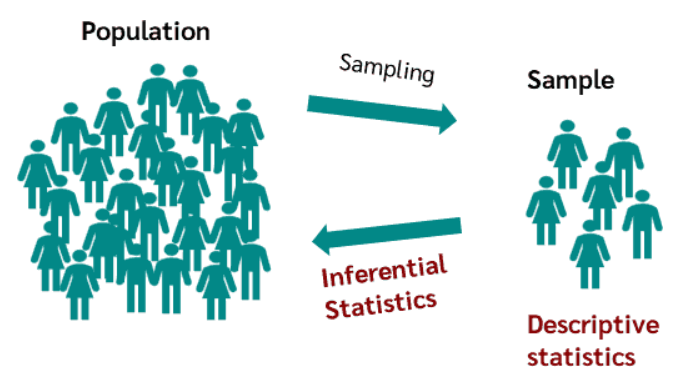

# 1. Data Distribution
a distribution is a function that shows the possible values for variable and how often they occur

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# simulate the outcome of dice roll

one_roll = np.random.choice([1,2,3,4,5,6])
one_roll

6

Python - List Comprehension

In [7]:
#Without list comprehension you will have to write a for statement with a conditional test inside:

fruits = ["apple", "banana", "cherry", "kiwi", "mango"]
newlist = []
for x in fruits:
  if "a" in x:
    newlist.append(x)
print(newlist)

#With list comprehension you can do all that with only one line of code:

fruits = ["apple", "banana", "cherry", "kiwi", "mango"]
newlist = [x for x in fruits if "a" in x]
print(newlist)

['apple', 'banana', 'mango']
['apple', 'banana', 'mango']


In [3]:
many_rolls = [np.random.choice([1, 2, 3, 4, 5, 6]) for i in range (100000)]

rolls_percent = pd.Series(many_rolls).value_counts(normalize=True)
rolls_percent

2    0.16872
6    0.16715
1    0.16671
4    0.16630
5    0.16595
3    0.16517
Name: proportion, dtype: float64

In [4]:
theo_prob = 1/6
theo_prob

0.16666666666666666

In [5]:
# using plotly express px.visualization type(var_name, visualization title, width, height, labels={index: ,value:})
px.bar(rolls_percent, title = 'rolls_percent', width=900, height=500, labels={'index': 'rolls','value':'probability' })

# Let's Simulate the outcome of two Die Rolls
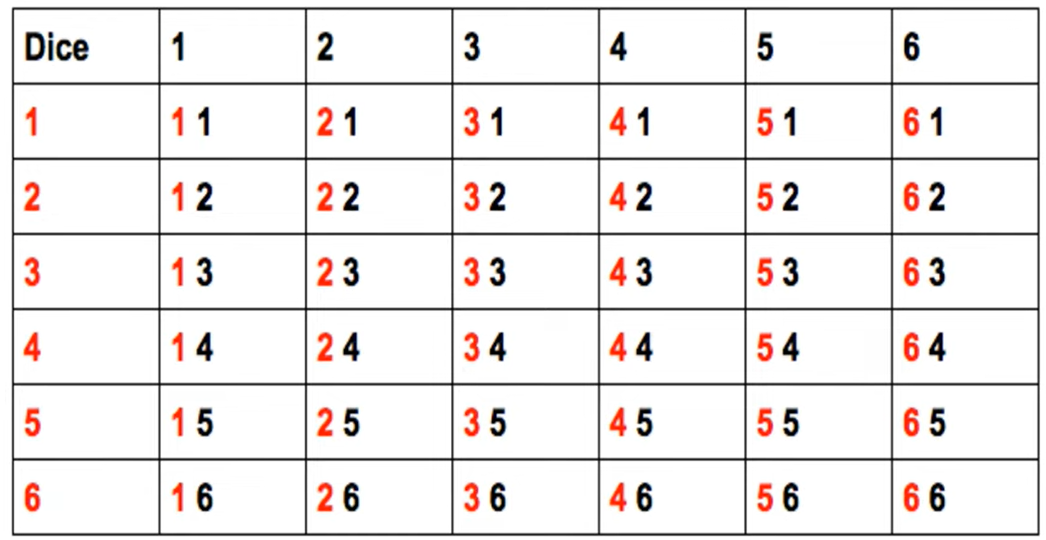

In [14]:
sum_of_twoDie = np.random.choice([1,2,3,4,5,6]) + np.random.choice([1,2,3,4,5,6]) 
sum_of_twoDie


12

In [16]:
many_rolls = [np.random.choice([1,2,3,4,5,6]) + np.random.choice([1,2,3,4,5,6]) for i in range(100000)]
percent_rolls = pd.Series(many_rolls).value_counts(normalize=True)
percent_rolls

7     0.16769
6     0.13938
8     0.13770
9     0.11109
5     0.11050
10    0.08279
4     0.08265
11    0.05664
3     0.05476
12    0.02846
2     0.02834
Name: proportion, dtype: float64

In [17]:
px.bar(percent_rolls, title='rolls_percent',width=900, height=500,labels={'index': 'rolls', 'value':'probability'})

### A low standard deviation indicates that the data points tend to be close to the mean, while a high standard deviation indicates that the data points are spread out over a wider range from the mean.

# Normal Distribution

np.random.normal is a function provided by the NumPy library in Python for generating random numbers that follow a normal (Gaussian) distribution. The normal distribution is characterized by a bell-shaped curve and is commonly used in various statistical analyses.

- ex: numpy.random.normal(loc, scale, size)
- loc: The mean of the distribution (center of the bell curve).
- scale: The standard deviation of the distribution (spread or width of the bell curve).
- size: The number of random samples to generate.

In [20]:
import numpy as np

In [30]:
# mean=100, std=10

mean, std = 100, 10
s  = np.random.normal(mean, std, size = 80000)
len(s)

80000

In [29]:
px.histogram(s, title="Normal Distribution", width=900, height=500, labels= {'count':'Probability', 'value':'Value'})

# 2. Z-Score and standard normal distribution

* Task 1 : Calculate the mean and standard deviation of the dataset
* Task 2 : standardize the dataset
* Task 3 : Plot the data on a graph to see the change

In [33]:
data = [567.45, 572.45, 572.45, 589.12, 613.87, 615.78, 628.45, 644.87, 650.45, 652.2, 656.87, 661.45, 666.45, 667.7, 668.95, 675.28, 675.78, 685.53, 694.28, 697.62, 705.78, 705.87, 708.12, 711.03, 714.03, 716.03, 722.28, 728.12, 728.7, 729.03, 730.12, 731.95, 735.03, 736.95, 737.37, 738.28, 739.78, 740.62, 743.62, 747.2, 748.2, 748.28, 748.53, 750.03, 752.12, 754.7, 755.03, 758.37, 760.53, 764.03, 769.28, 775.45, 781.2, 781.7, 785.62, 792.78, 793.37, 795.28, 797.62, 798.95, 799.7, 799.95, 810.87, 811.53, 813.62, 814.03, 814.78, 817.87, 818.87, 820.7, 821.12, 825.62, 828.62, 841.45, 842.03, 842.87, 849.62, 874.7, 878.78, 897.45]

In [40]:
#Task 1 : Calculate the mean and standard deviation of the dataset

data_mean = np.mean(data)
data_std = np.std(data)
data_mean, data_std

(743.0269999999999, 73.48951126521389)

In [36]:
data = np.array(data)
z_score = (data - data_mean) / data_std

In [37]:
# Task 2 : standardize the dataset
z_scores = [(x - data_mean) / data_std for x in data]
z_scores

[-2.3891436611459533,
 -2.3211067411294946,
 -2.3211067411294946,
 -2.0942716497946217,
 -1.757488895713151,
 -1.731498792266864,
 -1.5590932369451567,
 -1.3356599916111067,
 -1.2597307888727383,
 -1.2359178668669777,
 -1.1723713835716059,
 -1.1100495648365292,
 -1.0420126448200704,
 -1.0250034148159557,
 -1.007994184811841,
 -0.9218594440710053,
 -0.9150557520693594,
 -0.7823837580372649,
 -0.6633191480084621,
 -0.6178704854374673,
 -0.5068342319706071,
 -0.5056095674103104,
 -0.47499295340290393,
 -0.4353954659533254,
 -0.39457331394345013,
 -0.3673585459368667,
 -0.28231239591629326,
 -0.20284527333706903,
 -0.19495299061515925,
 -0.19046255389407396,
 -0.17563050533048555,
 -0.1507289926044611,
 -0.10881824987432351,
 -0.08269207258800236,
 -0.07697697130662039,
 -0.06459425186362533,
 -0.044183175858687716,
 -0.032752973295922215,
 0.00806917871395302,
 0.056783613445738026,
 0.07039099744902977,
 0.07147958816929212,
 0.07488143417011506,
 0.09529251017505268,
 0.1237319427419328

In [38]:
from scipy.stats import zscore

z_scores = zscore(data)
z_scores

array([-2.38914366, -2.32110674, -2.32110674, -2.09427165, -1.7574889 ,
       -1.73149879, -1.55909324, -1.33565999, -1.25973079, -1.23591787,
       -1.17237138, -1.11004956, -1.04201264, -1.02500341, -1.00799418,
       -0.92185944, -0.91505575, -0.78238376, -0.66331915, -0.61787049,
       -0.50683423, -0.50560957, -0.47499295, -0.43539547, -0.39457331,
       -0.36735855, -0.2823124 , -0.20284527, -0.19495299, -0.19046255,
       -0.17563051, -0.15072899, -0.10881825, -0.08269207, -0.07697697,
       -0.06459425, -0.04418318, -0.03275297,  0.00806918,  0.05678361,
        0.070391  ,  0.07147959,  0.07488143,  0.09529251,  0.12373194,
        0.15883899,  0.16332943,  0.20877809,  0.23817004,  0.28579589,
        0.35723465,  0.44119221,  0.51943467,  0.52623836,  0.57957931,
        0.67700818,  0.68503653,  0.71102664,  0.74286791,  0.76096574,
        0.77117127,  0.77457312,  0.92316575,  0.93214663,  0.96058606,
        0.96616509,  0.97637062,  1.01841744,  1.03202482,  1.05

In [39]:
# Task 3

fig1 = px.histogram(z_scores,title='standard Normal Distribution', width=600, height=400 )
fig1.show()

In [41]:
fig1 = px.histogram(data,title='standard Normal Distribution', width=600, height=400 )
fig1.show()

# Example 2 : Which player is better?

 * Player 1: scored 12 goals in his League which has goals with Mean = 9 , sd=2
 * Player 2: scored 19 goals in his League which has goals with Mean = 15 , sd=3

In [43]:
def z_score(x, mean, std):
    return (x-mean) / std

In [44]:
P1 = z_score(12, 9, 2)
P2 = z_score(19, 15, 3)

In [45]:
print(f'z_score of player1 = {round(P1, 5)}')
print(f'z_score of player2 = {round(P2, 5)}')

z_score of player1 = 1.5
z_score of player2 = 1.33333


### Cumulative Distribution Function (CDF)

The norm.cdf function is part of the SciPy library in Python and is used to compute the cumulative distribution function (CDF) of a normal (Gaussian) distribution. The cumulative distribution function gives the probability that a random variable from the distribution will be less than or equal to a specified value.

* scipy.stats.norm.cdf(x, loc=0, scale=1)
- x: The value for which you want to compute the cumulative probability.
- loc: The mean of the distribution (default is 0).
- scale: The standard deviation of the distribution (default is 1).

In [51]:
from scipy.stats import norm

p1_percentile = norm.cdf(P1)
p2_percentile = norm.cdf(P2)
p1_percentile, p2_percentile

(0.9331927987311419, 0.9087887802741321)

In [55]:
print(f'probability of P1 = {round(p1_percentile*100 , 1)} %')
print(f'probability of P2 = {round(p2_percentile*100 , 1)} %')

probability of P1 = 93.3 %
probability of P2 = 90.9 %


# 3. Sampling Distribution

In [58]:
# Calculate the population mean

print(f'size of dataset = {len(data)}')
print(f'mean of population = {round(np.mean(data), 2)}')

size of dataset = 80
mean of population = 743.03


In [56]:
data

array([567.45, 572.45, 572.45, 589.12, 613.87, 615.78, 628.45, 644.87,
       650.45, 652.2 , 656.87, 661.45, 666.45, 667.7 , 668.95, 675.28,
       675.78, 685.53, 694.28, 697.62, 705.78, 705.87, 708.12, 711.03,
       714.03, 716.03, 722.28, 728.12, 728.7 , 729.03, 730.12, 731.95,
       735.03, 736.95, 737.37, 738.28, 739.78, 740.62, 743.62, 747.2 ,
       748.2 , 748.28, 748.53, 750.03, 752.12, 754.7 , 755.03, 758.37,
       760.53, 764.03, 769.28, 775.45, 781.2 , 781.7 , 785.62, 792.78,
       793.37, 795.28, 797.62, 798.95, 799.7 , 799.95, 810.87, 811.53,
       813.62, 814.03, 814.78, 817.87, 818.87, 820.7 , 821.12, 825.62,
       828.62, 841.45, 842.03, 842.87, 849.62, 874.7 , 878.78, 897.45])

In [59]:
px.histogram(data, title='Data Distribution', width= 700, height=400)

In [60]:
# take a sample from dataset

sample = np.random.choice(data, size = 10)
sample

array([722.28, 820.7 , 750.03, 878.78, 735.03, 722.28, 781.2 , 792.78,
       668.95, 661.45])

In [61]:
# calculate the sample mean
sample.mean()

753.348

# 4. The Standard Error of Sample mean

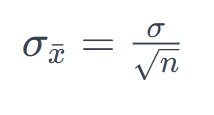
where:
- σx  is the standard error of the sample mean.
- σ is the population standard deviation.
- n is the sample size.

In [66]:
import math
# calculate the standard error of sample mean = std/sqrt(n)

pop_std = np.std(data)
sample_size = len(sample)
error = pop_std/(sample_size**0.5)
print(f'The Standard Error of Sample mean = {round(error,2)}')

The Standard Error of Sample mean = 23.24


In [70]:
# try taking a larger sample from dataset

print(f' length of data = {len(data)}')
sample = np.random.choice(data, 50)
sample

 length of data = 80


array([792.78, 825.62, 572.45, 799.95, 747.2 , 666.45, 685.53, 760.53,
       572.45, 781.7 , 814.78, 811.53, 813.62, 572.45, 737.37, 748.28,
       652.2 , 722.28, 743.62, 675.78, 760.53, 728.12, 798.95, 735.03,
       650.45, 736.95, 730.12, 567.45, 736.95, 785.62, 668.95, 798.95,
       797.62, 747.2 , 748.2 , 615.78, 785.62, 705.87, 781.2 , 878.78,
       797.62, 842.87, 748.53, 667.7 , 752.12, 755.03, 661.45, 728.12,
       740.62, 722.28])

In [72]:
import math
# calculate the standard error of sample mean = std/sqrt(n)

pop_std = np.std(data)
sample_size = len(sample)
error = pop_std/math.sqrt((sample_size))
print(f'The Standard Error of Sample mean = {round(error,2)}')

#while number of samples increase the error decrease...

The Standard Error of Sample mean = 10.39


#### Plotly is an open-source Python graphing library that allows users to create interactive and visually appealing plots and charts. It supports a variety of chart types, including scatter plots, line charts, bar charts, heatmaps, and more. Plotly is versatile and widely used for creating interactive dashboards, data visualizations, and reports.

- #####  make_subplots:  specifically allows you to create subplots within a single figure.
- ##### graph_objects: It allows you to construct plots by creating instances of specific trace types (like scatter, bar, line, etc.) and configuring their properties.

- go.Scatter creates a scatter plot trace.
- go.Layout creates a layout for the plot.
- go.Figure combines the trace and layout to create a complete figure.
- fig.show() displays the figure.

In [76]:
# example of graph_objects:

import plotly.graph_objects as go

# Create a scatter plot
trace = go.Scatter(x=[1, 2, 3], y=[4, 5, 6], mode='markers', name='Scatter Plot')

# Create a layout
layout = go.Layout(title='My Scatter Plot', xaxis=dict(title='X-axis'), yaxis=dict(title='Y-axis'))

# Create a figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()

In [94]:
!pip install plotly

In [106]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=('Population Data Distribution', 'Sampled Data Distribution'))

trace1 = go.Histogram(x = data)
trace2 = go.Histogram(x = sample)
#trace3 = go.Scatter(x = data)

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
#fig.add_trace(trace3, row=1, col=1)

fig.update_layout(title_text='Subplots Example')

fig.show()

In [84]:
data

array([567.45, 572.45, 572.45, 589.12, 613.87, 615.78, 628.45, 644.87,
       650.45, 652.2 , 656.87, 661.45, 666.45, 667.7 , 668.95, 675.28,
       675.78, 685.53, 694.28, 697.62, 705.78, 705.87, 708.12, 711.03,
       714.03, 716.03, 722.28, 728.12, 728.7 , 729.03, 730.12, 731.95,
       735.03, 736.95, 737.37, 738.28, 739.78, 740.62, 743.62, 747.2 ,
       748.2 , 748.28, 748.53, 750.03, 752.12, 754.7 , 755.03, 758.37,
       760.53, 764.03, 769.28, 775.45, 781.2 , 781.7 , 785.62, 792.78,
       793.37, 795.28, 797.62, 798.95, 799.7 , 799.95, 810.87, 811.53,
       813.62, 814.03, 814.78, 817.87, 818.87, 820.7 , 821.12, 825.62,
       828.62, 841.45, 842.03, 842.87, 849.62, 874.7 , 878.78, 897.45])

In [85]:
sample

array([792.78, 825.62, 572.45, 799.95, 747.2 , 666.45, 685.53, 760.53,
       572.45, 781.7 , 814.78, 811.53, 813.62, 572.45, 737.37, 748.28,
       652.2 , 722.28, 743.62, 675.78, 760.53, 728.12, 798.95, 735.03,
       650.45, 736.95, 730.12, 567.45, 736.95, 785.62, 668.95, 798.95,
       797.62, 747.2 , 748.2 , 615.78, 785.62, 705.87, 781.2 , 878.78,
       797.62, 842.87, 748.53, 667.7 , 752.12, 755.03, 661.45, 728.12,
       740.62, 722.28])

In [107]:
print('Population Mean: ', np.mean(data))
print('Mean of sampling: ', np.mean(sample))
print('Population standard Deviation: ', np.std(data))
print('standard Deviation of sampling: ', np.std(sample))

Population Mean:  743.0269999999999
Mean of sampling:  733.425
Population standard Deviation:  73.48951126521389
standard Deviation of sampling:  71.63386465213223


# 5. Confidence Intervals

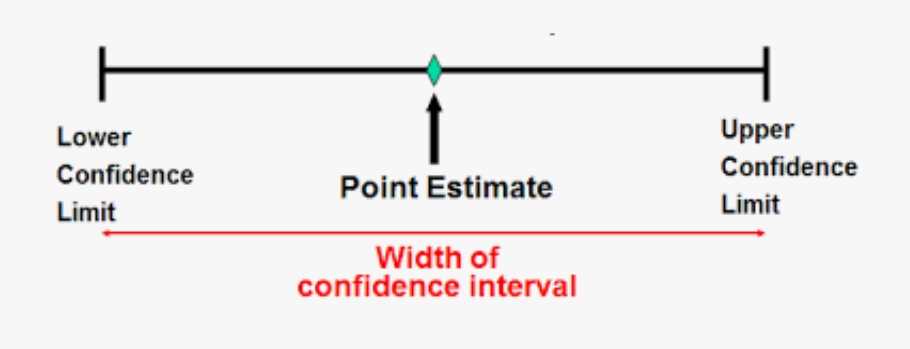

Example : Construct a 95 % confidence interval an experiment that found the  sample mean temperature for a certain city in August was 101.82, with a population  standard deviation of 1.2. There were 6 samples in this experiment.

- Step 1: Subtract the confidence level (Given as 95 percent in the question) from 1 and then divide the result 
by two. This is your alpha level, which represents the area in one tail. (1 – 0.95) / 2 = 0.025
- Step 2: Subtract your result from Step 1 from 1 and then look that area up in the middle of the z-table to get 
the z-score: 1 – 0.025 = 0.975 ➔ z score = 1.96.
- Step 3: Plug the numbers into the second part of the formula and solve: z* σ / (√n) = 1.96 * 1.2/√(6) = 0.96
- Step 4: For the lower end of the range, subtract step 3 from the mean: 101.82 – 0.96 = 100.86
- Step 5: For the upper end of the range, add step 3 to the mean: 101.82 + 0.96 = 102.78.
The CI is (100.86,102.78)


In [116]:
low , upper = norm.interval(0.95, loc=np.mean(sample), scale=standard_error)
print(f"95% Confidence Interval: ({round(low, 2)}, {round(upper, 2)})")

# Corresponding Z-score
z_low, z_upper = norm.interval(0.95)
print(f"Z-score for 95% Confidence Interval: ({round(z_low, 2)}, {round(z_upper, 2)})")

95% Confidence Interval: (732.46, 734.39)
Z-score for 95% Confidence Interval: (-1.96, 1.96)


In [109]:
ci = 0.95
x_bar = 101.82
sigma = 1.2
n = 6

In [110]:
alpha = 1 - ci
reliability_factor = norm.ppf(1-alpha/2)  # z-score
reliability_factor

1.959963984540054

In [111]:
standard_error = sigma/np.sqrt(n)
standard_error

0.48989794855663565

In [112]:
margin_of_error = reliability_factor * standard_error
margin_of_error

0.960182335271062

In [113]:
lower = x_bar - margin_of_error
upper = x_bar + margin_of_error
print(f"95% Confidence Interval: ({round(lower, 2)}, {round(upper, 2)})")

95% Confidence Interval: (100.86, 102.78)


In [114]:
lower , upper = norm.interval(ci, x_bar, sigma/np.sqrt(n))
print(f"95% Confidence Interval: ({round(lower, 2)}, {round(upper, 2)})")

95% Confidence Interval: (100.86, 102.78)
